## IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
pd.set_option('display.max_colwidth',500) # sets the maximum width of the columns displayed in the console output to 500 characters
#pd.set_option('display.max_rows', None) # sets the maximum width of the columns displayed in the console output to 500 characters

## IMPORT THE DATASET

In [3]:
##IMPORT THE DATASET

df = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')

In [4]:
##MAKING A COPY OF THE DATASET

df1 = df.copy()

## ASSESSING THE DATASET

In [5]:
df1.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


##### FROM THE RESULT ABOVE:
1.We have 38765 enteries with no null value
2.Wrong data type for the date column

In [7]:
## CONFIRMING THERE ARE NO NULL VALUES IN EACH COLUMN
df1.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
##DETERMINING IF THERE ARE DUPLICATES

no_of_duplicates = df1.duplicated().sum()
no_of_duplicates


#are they actually duplicates or the customer came back to buy more
#if we had a time column maybe we could determine it
#but without that i'm left to believe they are duplicates and should be dropped

759

## CLEANING

#### ISSUES TO BE CORRECTED
1.Change the datatype for the date column
2.Dropping duplicates 

In [9]:
## CHANGING DATATYPE FOR THE DATE COLUMN
df1['Date'] = pd.to_datetime(df1['Date'])


C:\Users\ABDULWAHAB\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ABDULWAHAB\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ABDULWAHAB\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ABDULWAHAB\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Prov

In [10]:
##confirming datatype has been changed
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [11]:
## DROPPING DUPLICATES
df1.drop_duplicates(inplace=True)


In [12]:
##CONFIRMING DUPLICATES HAVE BEEN DROPPED
no_of_duplicates = df1.duplicated().sum()
no_of_duplicates

0

### EXTRACTING DAY OF THE WEEK


In [13]:
# extracting weekday and display full name of the weekday
df1['weekday'] = df1['Date'].dt.strftime('%A')

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38006 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38006 non-null  int64         
 1   Date             38006 non-null  datetime64[ns]
 2   itemDescription  38006 non-null  object        
 3   weekday          38006 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.4+ MB


### EXPLORING THE DATA

In [15]:
##Determing the time period of the dataset
print(df1['Date'].min(),'to' ,df1['Date'].max())

2014-01-01 00:00:00 to 2015-12-30 00:00:00


The dataset is between the year 2014 - 2015

## Quantity sold by weekday


In [16]:
# count the number of transactions by days of week, reorder by names of the days
qty_wd = df1.groupby('weekday', as_index=False)['itemDescription'].count()
qty_wd['wdkey'] = [4,0,5,6,3,1,2]
qty_wd.sort_values("wdkey",inplace=True)
qty_wd

,weekday,itemDescription,wdkey
1,Monday,5203,0
5,Tuesday,5396,1
6,Wednesday,5561,2
4,Thursday,5630,3
0,Friday,5399,4
2,Saturday,5296,5
3,Sunday,5521,6


In [17]:
qty_wd

,weekday,itemDescription,wdkey
1,Monday,5203,0
5,Tuesday,5396,1
6,Wednesday,5561,2
4,Thursday,5630,3
0,Friday,5399,4
2,Saturday,5296,5
3,Sunday,5521,6


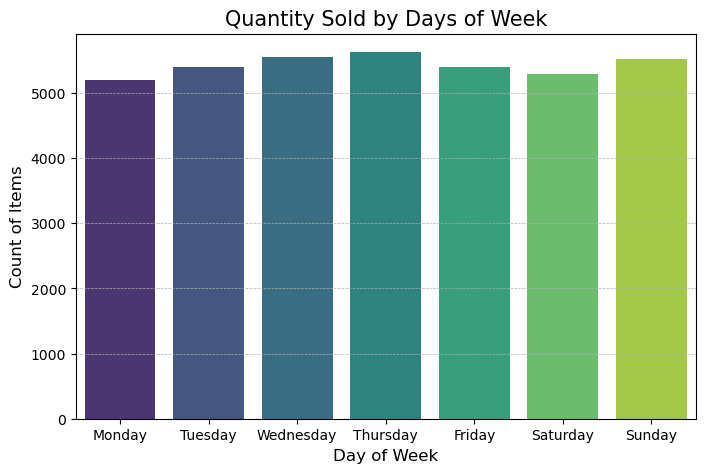

<Figure size 640x480 with 0 Axes>

In [18]:
# create bar plot showing the number of items sold by days of week
plt.figure(figsize=(8,5))
sb.barplot(x = 'weekday', y = 'itemDescription', data = qty_wd, palette = 'viridis')
plt.xlabel('Day of Week', size = 12)
plt.ylabel('Count of Items', size = 12)
plt.title('Quantity Sold by Days of Week', size = 15)
plt.grid(axis = 'y', ls='--', lw='0.5')
plt.show()


#to save chart
plt.savefig("seaborn_plot.png")

### TOP PURCHASING CUSTOMERS

In [19]:
##CUSTOMER THAT HAS BOUGHT THE MOST THINGS
#customer_that_has_bought_the_most_things = df1.groupby('Member_number').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False)

top_purchasing_customer = pd.DataFrame(df1['Member_number'].value_counts(sort=True)).reset_index()
top_purchasing_customer.columns = ['Member_number', 'count']
top_purchasing_customer  = top_purchasing_customer.head(30)
top_purchasing_customer 

,Member_number,count
0,3180,35
1,3737,33
2,3050,32
3,2051,31
4,3915,30
5,2433,30
6,2625,30
7,2851,29
8,2394,29
9,3872,29


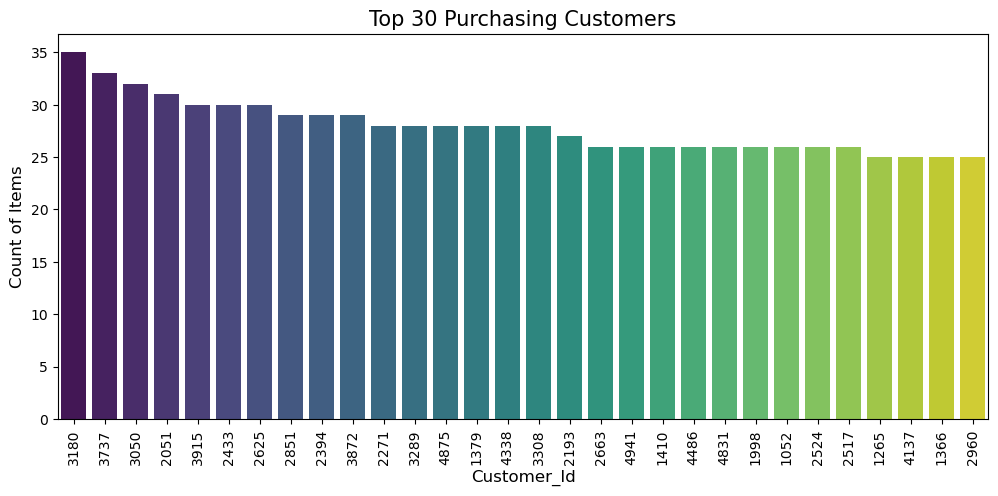

In [60]:
##Create bar chart showing customers that has bought more items
plt.figure(figsize=(12,5))
sb.barplot(x='Member_number',y='count',data= top_purchasing_customer ,order=top_purchasing_customer.sort_values('count',ascending=False).Member_number,palette='viridis')
plt.xlabel('Customer_Id',size=12)
plt.xticks(rotation=90)
plt.ylabel('Count of Items',size=12)
plt.title('Top 30 Purchasing Customers', size = 15)
plt.show()

### RETURNING CUSTOMERS

In [21]:
##HOW MANY TIMES A CUSTOMER HAS COME BACK

two_col = df1[['Member_number' ,'Date']]
returning_customer = two_col.groupby(['Member_number','Date']).size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False)
returning_customer = returning_customer.head(30)
returning_customer

## I grouped by bother member_number and date, to indicate the unique number of times a customer came to a store
#this could indicate your most loyal customers

,Member_number,Date,Frequency
2871,1780,2015-12-07,10
1057,1290,2015-04-24,9
5458,2465,2015-12-27,9
9769,3620,2015-06-18,9
13025,4486,2015-09-11,9
6692,2792,2015-07-29,9
10498,3814,2015-07-21,9
14768,4941,2015-01-15,9
2778,1757,2015-06-15,9
9457,3543,2015-11-10,9


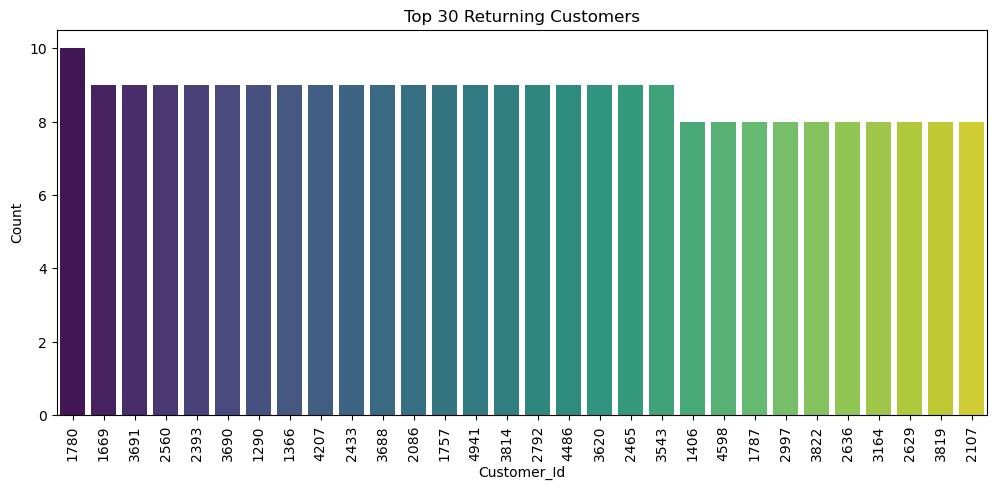

In [61]:
plt.figure(figsize=(12,5))
sb.barplot(x='Member_number',y='Frequency', data= returning_customer,palette='viridis',order=returning_customer.sort_values('Frequency',ascending=False).Member_number)
plt.xlabel('Customer_Id')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Top 30 Returning Customers')
plt.show()      

## Comparing the graphs 'Top 30 Purchasing Customers' and 'Top Returning Customers'
Top purchasing customers are not top returning customers

In [23]:
##checking if top purchasing customers are top returning customers
compare_top_purchasing_and_returning_customers = top_purchasing_customer['Member_number'].isin(returning_customer['Member_number']).value_counts()

In [24]:
compare_top_purchasing_and_returning_customers

False    26
True      4
Name: Member_number, dtype: int64

### TOP SELLING ITEMS

In [47]:
## THE MOST BOUGHT PRODUCT
top_selling_item = df1.groupby('itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False)
top_selling_item = top_selling_item.head(20)

In [48]:
top_selling_item

,itemDescription,Frequency
164,whole milk,2363
102,other vegetables,1827
122,rolls/buns,1646
138,soda,1453
165,yogurt,1285
123,root vegetables,1041
156,tropical fruit,1014
12,bottled water,908
130,sausage,903
30,citrus fruit,795


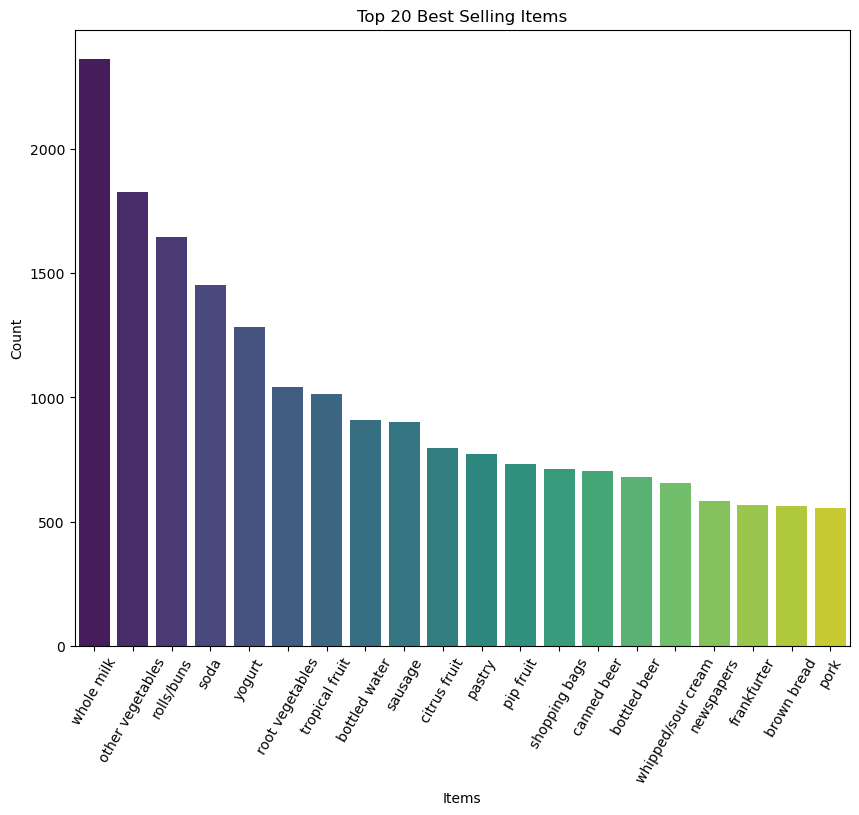

In [26]:
plt.figure(figsize=(12,5))
sb.barplot(x='itemDescription',y='Frequency', data=top_selling_item, palette='viridis',order=top_selling_item.sort_values('Frequency',ascending=False).itemDescription)
plt.xlabel('Items')
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.title('Top 20 Best Selling Items')
plt.show()      

### LEAST BOUGHT ITEMS

In [27]:
##THE LEAST BOUGHT PRODUCTS
least_selling_item = df1.groupby('itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency',ascending=False)
least_selling_item = least_selling_item.tail(20)
least_selling_item

,itemDescription,Frequency
36,cooking chocolate,15
118,ready soups,15
71,honey,13
38,cream,12
60,frozen fruits,11
147,specialty vegetables,11
100,organic products,10
42,decalcifier,9
66,hair spray,9
81,liqueur,9


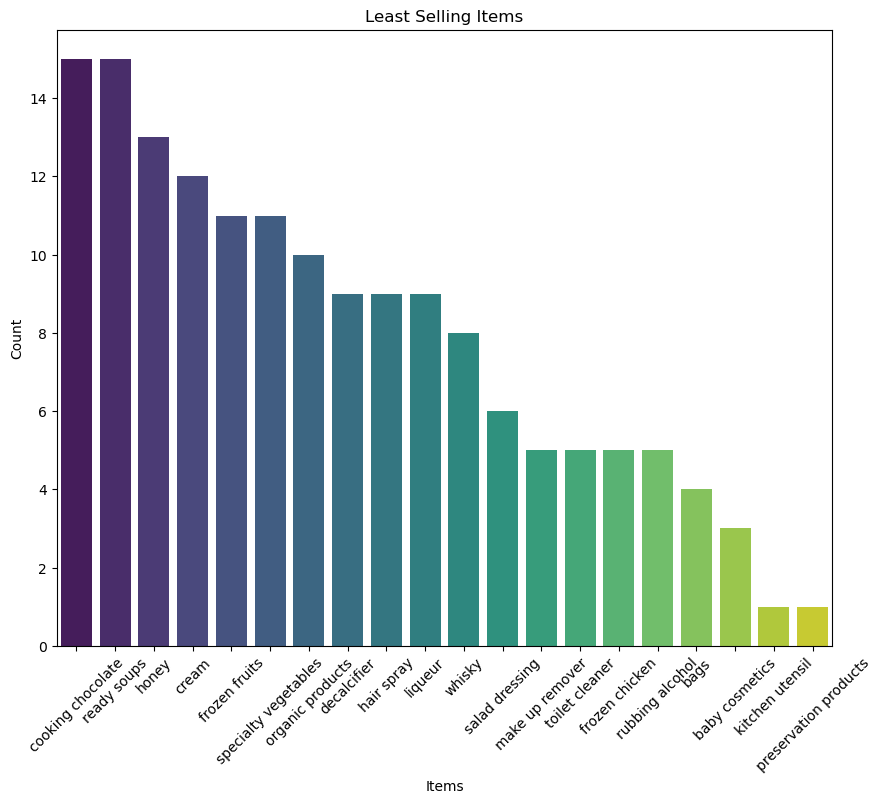

In [28]:
plt.figure(figsize=(12,5))
sb.barplot(x='itemDescription',y='Frequency', data=least_selling_item, palette='viridis',order=least_selling_item.sort_values('Frequency',ascending=False).itemDescription)
plt.xlabel('Items')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Least Selling Items')
plt.show()      

Comparing the graphs of the best selling items and least sellings
We see that 3 fruits(tropical fruit,citrus fruite and pip fruit) are one of the best selling items but looking at the least 
sold items, we can see a particular fruit,frozen fruit which has barely made sales,what could be the reason for this?

#We see something similar  in vegetables
Root vegetables and Other Vegetables are one of the best selling items but specialty vegetable is one of the least sold items



### Pre-processing Data for Association Rule Mining - Transforming the data structure in preparation for association rule mining

In [29]:
#Convert dataframe into transaction data
#Group by the member_number and date to combine items for each transaction
#this is joined by a row
#this is essentially to convert the dataset to a transaction by row
transaction_data = df1.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: ','.join(x)).reset_index()
transaction_data

,Member_number,Date,itemDescription
0,1000,2014-06-24,"whole milk,pastry,salty snack"
1,1000,2015-03-15,"sausage,whole milk,semi-finished bread,yogurt"
2,1000,2015-05-27,"soda,pickled vegetables"
3,1000,2015-07-24,"canned beer,misc. beverages"
4,1000,2015-11-25,"sausage,hygiene articles"
...,...,...,...
14958,4999,2015-05-16,"butter milk,whipped/sour cream"
14959,4999,2015-12-26,"bottled water,herbs"
14960,5000,2014-09-03,"fruit/vegetable juice,onions"
14961,5000,2014-11-16,"bottled beer,other vegetables"


In [30]:
#Drop unnecessary columns that are not required for the processing
columns_to_drop = ['Member_number','Date']
transaction_data.drop(columns=columns_to_drop,inplace=True)
transaction_data

,itemDescription
0,"whole milk,pastry,salty snack"
1,"sausage,whole milk,semi-finished bread,yogurt"
2,"soda,pickled vegetables"
3,"canned beer,misc. beverages"
4,"sausage,hygiene articles"
...,...
14958,"butter milk,whipped/sour cream"
14959,"bottled water,herbs"
14960,"fruit/vegetable juice,onions"
14961,"bottled beer,other vegetables"


In [31]:
# Save the transaction data to a CSV file
transaction_data.to_csv('transaction_data', index=False)

In [32]:
# Display the first few rows of the transaction data
print("\nTransaction Data for Association Rule Mining:")
print(transaction_data.head())
transaction_data.shape


Transaction Data for Association Rule Mining:
                                 itemDescription
0                  whole milk,pastry,salty snack
1  sausage,whole milk,semi-finished bread,yogurt
2                        soda,pickled vegetables
3                    canned beer,misc. beverages
4                       sausage,hygiene articles


(14963, 1)

## Formatting the transaction data in a suitable format for analysis

Developing the preprocessed data into analysis. 
Split the 'itemDescription' column in transaction_data into individual items using str.split(', ', expand=True).
Concatenate the original DataFrame (transaction_data) with the items DataFrame (items_df) using pd.concat.
Drop the original 'itemDEscription' column since individual items are now in separate columns.
Display the resulting DataFrame.

In [33]:
# Split the 'itemDescription' column into individual items
items_df = transaction_data['itemDescription'].str.split(',',expand=True)
items_df

,0,1,2,3,4,5,6,7,8,9
0,whole milk,pastry,salty snack,None,None,None,None,None,None,None
1,sausage,whole milk,semi-finished bread,yogurt,None,None,None,None,None,None
2,soda,pickled vegetables,None,None,None,None,None,None,None,None
3,canned beer,misc. beverages,None,None,None,None,None,None,None,None
4,sausage,hygiene articles,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
14958,butter milk,whipped/sour cream,None,None,None,None,None,None,None,None
14959,bottled water,herbs,None,None,None,None,None,None,None,None
14960,fruit/vegetable juice,onions,None,None,None,None,None,None,None,None
14961,bottled beer,other vegetables,None,None,None,None,None,None,None,None


In [34]:
# Concatenate the original DataFrame with the new items DataFrame
transaction_data = pd.concat([transaction_data, items_df], axis=1)
transaction_data

,itemDescription,0,1,2,3,4,5,6,7,8,9
0,"whole milk,pastry,salty snack",whole milk,pastry,salty snack,None,None,None,None,None,None,None
1,"sausage,whole milk,semi-finished bread,yogurt",sausage,whole milk,semi-finished bread,yogurt,None,None,None,None,None,None
2,"soda,pickled vegetables",soda,pickled vegetables,None,None,None,None,None,None,None,None
3,"canned beer,misc. beverages",canned beer,misc. beverages,None,None,None,None,None,None,None,None
4,"sausage,hygiene articles",sausage,hygiene articles,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
14958,"butter milk,whipped/sour cream",butter milk,whipped/sour cream,None,None,None,None,None,None,None,None
14959,"bottled water,herbs",bottled water,herbs,None,None,None,None,None,None,None,None
14960,"fruit/vegetable juice,onions",fruit/vegetable juice,onions,None,None,None,None,None,None,None,None
14961,"bottled beer,other vegetables",bottled beer,other vegetables,None,None,None,None,None,None,None,None


In [35]:
# Drop the original 'itemDescription' column
transaction_data = transaction_data.drop('itemDescription', axis=1)

# Display the resulting DataFrame
transaction_data.head()

,0,1,2,3,4,5,6,7,8,9
0,whole milk,pastry,salty snack,None,None,None,None,None,None,None
1,sausage,whole milk,semi-finished bread,yogurt,None,None,None,None,None,None
2,soda,pickled vegetables,None,None,None,None,None,None,None,None
3,canned beer,misc. beverages,None,None,None,None,None,None,None,None
4,sausage,hygiene articles,None,None,None,None,None,None,None,None


### ASSOCIATION RULE

Converting Items to Boolean Columns
To prepare the data for association rule mining, we convert the items in the transaction_data DataFrame into boolean columns using one-hot encoding.
This is achieved through the pd.get_dummies function, which creates a new DataFrame (df_encoded) with boolean columns representing the presence or absence of each item.

In [36]:
# Convert items to boolean columns
df_encoded = pd.get_dummies(transaction_data,prefix='',prefix_sep='').groupby(level=0,axis=1).max()
df_encoded

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Save the transaction data to a CSV file
df_encoded.to_csv('transaction_data_encoded.csv', index=False)

### Association Rule Mining

We apply the Apriori algorithm to perform association rule mining on the encoded transaction data. 
The min_support parameter is set to 0.0006 to filter out infrequent itemsets. 
The resulting frequent itemsets are then used to generate association rules based on a minimum confidence threshold of 1.1.
Finally, we print the generated association rules.

In [38]:
df_encoded = pd.read_csv('transaction_data_encoded.csv')

## from mlxtend.frequent_patterns import apriori, association_rules
df_encoded.sample(15)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
13114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
10323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4401,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Load transaction data into a DataFrame
df_encoded = pd.read_csv('transaction_data_encoded.csv')

In [40]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Columns: 167 entries, Instant food products to zwieback
dtypes: int64(167)
memory usage: 19.1 MB


## Association Rule Mining

Minimum support is the minimum frequency or occurrence threshold that an itemset must meet to be considered frequent.

Let's say an itemset is considered frequent if it appears at least 0.06% in total number of transactions (0.06% of 14962).

In [ ]:
# Association Rule Mining
frequent_itemsets = apriori(df_encoded.astype('bool'), min_support=0.0006, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)

In [53]:
rules.shape

(520, 10)

In [55]:
rules.sort_values(by='support',ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
352,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
353,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
234,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
235,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
54,(bottled beer),(sausage),0.045312,0.060349,0.003342,0.073746,1.222000,0.000607,1.014464,0.190292
55,(sausage),(bottled beer),0.060349,0.045312,0.003342,0.055371,1.222000,0.000607,1.010649,0.193337
185,(sausage),(curd),0.060349,0.033683,0.002941,0.048726,1.446615,0.000908,1.015814,0.328559
184,(curd),(sausage),0.033683,0.060349,0.002941,0.087302,1.446615,0.000908,1.029531,0.319493
68,(canned beer),(brown bread),0.046916,0.037626,0.002406,0.051282,1.362937,0.000641,1.014394,0.279398
69,(brown bread),(canned beer),0.037626,0.046916,0.002406,0.063943,1.362937,0.000641,1.018191,0.276701


In [43]:
pd.set_option('display.max_rows', None)
frequent_itemsets.sort_values(by='support',ascending=False)


,support,itemsets
154,0.157923,(whole milk)
97,0.122101,(other vegetables)
116,0.110005,(rolls/buns)
130,0.097106,(soda)
155,0.085879,(yogurt)
117,0.069572,(root vegetables)
147,0.067767,(tropical fruit)
10,0.060683,(bottled water)
122,0.060349,(sausage)
28,0.053131,(citrus fruit)


In [44]:
rules.sort_values(by='lift',ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
258,(soft cheese),(hamburger meat),0.010025,0.021854,0.000601,0.060000,2.745505,0.000382,1.040581,0.642206
259,(hamburger meat),(soft cheese),0.021854,0.010025,0.000601,0.027523,2.745505,0.000382,1.017993,0.649973
446,(whole milk),"(sausage, pork)",0.157923,0.001537,0.000601,0.003809,2.477819,0.000359,1.002280,0.708272
443,"(sausage, pork)",(whole milk),0.001537,0.157923,0.000601,0.391304,2.477819,0.000359,1.383412,0.597337
372,(tropical fruit),(sweet spreads),0.067767,0.004545,0.000735,0.010848,2.387066,0.000427,1.006373,0.623316


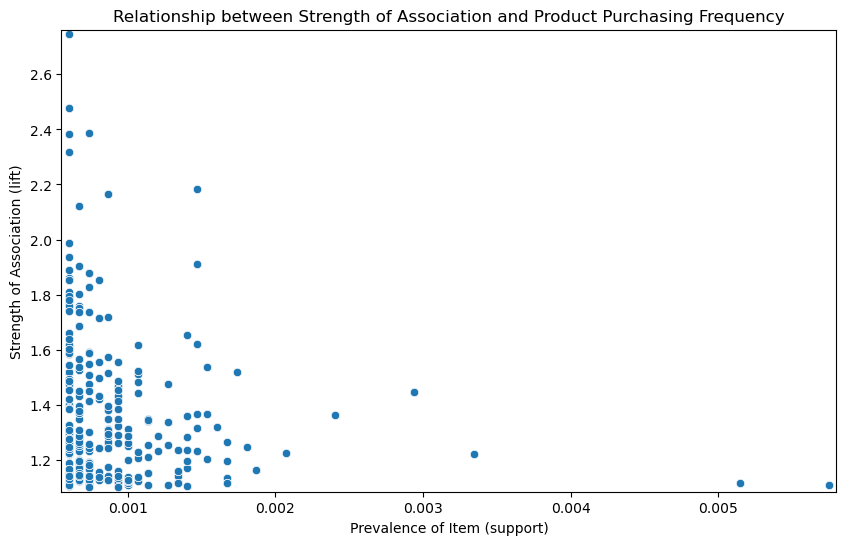

In [45]:
plt.figure(figsize=(10,6))
sb.scatterplot(x = "support", y = "lift", data = rules)
plt.margins(0.01,0.01)
plt.title("Relationship between Strength of Association and Product Purchasing Frequency")
plt.ylabel("Strength of Association (lift)")
plt.xlabel("Prevalence of Item (support)")
plt.show()




Itemsets(2 or more items) that have lower support values(lower occurrence of the set in the dataset) have higher lift showing that there appearance in a purchase is usually associated with a particular item ie. they are more frequently bought together


## Itemsets Lift Heatmap

C:\Users\ABDULWAHAB\AppData\Local\Temp\ipykernel_9972\965504429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_lift['antecedents'] = rules_lift['antecedents'].apply(lambda a: ','.join(list(a)))
C:\Users\ABDULWAHAB\AppData\Local\Temp\ipykernel_9972\965504429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_lift['consequents'] = rules_lift['consequents'].apply(lambda a: ','.join(list(a)))


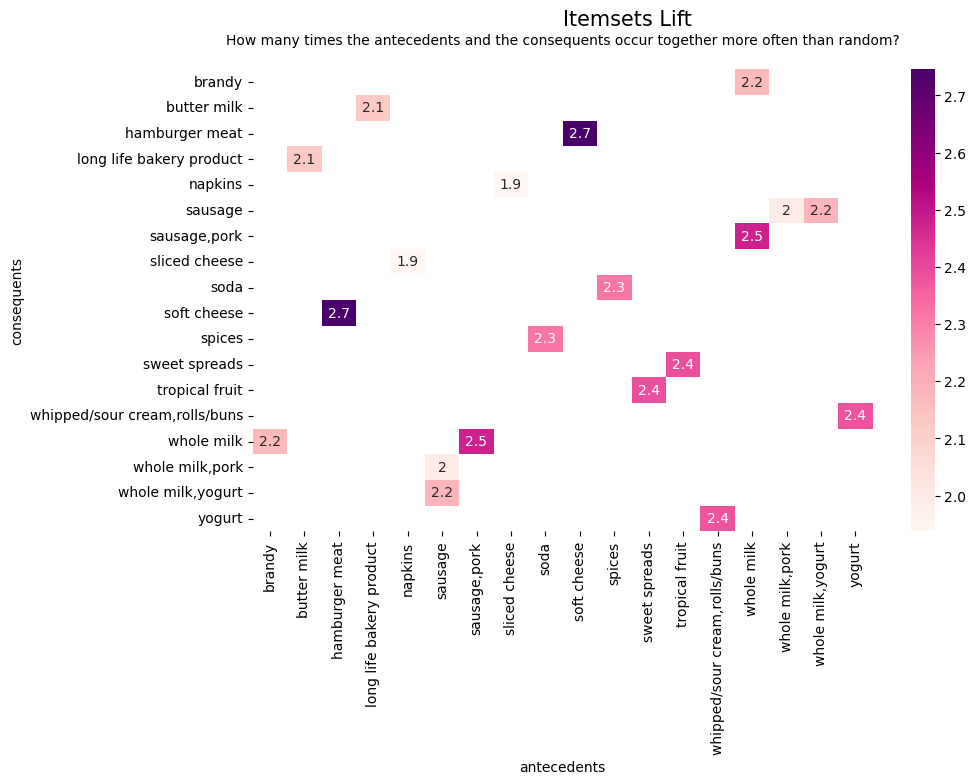

In [46]:
#items with minimum lift value 1.937375
rules_lift = rules[rules['lift']>1.937375]

# convert antecedents and consequents into strings to make it more readable/accessible
rules_lift['antecedents'] = rules_lift['antecedents'].apply(lambda a: ','.join(list(a)))
rules_lift['consequents'] = rules_lift['consequents'].apply(lambda a: ','.join(list(a)))

# transform antecedent, consequent, and support columns into matrix/table
#pivots the rules dataframe into a support table format with lift values for analyzing the strength of rules

support_table_liftt = rules_lift.pivot(index='consequents', columns='antecedents', values='lift')

#.pivot() pivots the dataframe into a table format.
#index='consequents' - Sets the index to the 'consequents' column. This will be the rows.
#columns='antecedents' - Sets the columns to the 'antecedents' column. This will be the columns.
#values='lift' - Populates the cells of the table with values from the 'lift' column.


#generate a heatmap with annotations 
plt.figure(figsize=(10,6))
sb.heatmap(support_table_liftt, annot = True, cbar = True, cmap="RdPu")
plt.suptitle('Itemsets Lift', size = 15)
plt.title('How many times the antecedents and the consequents occur together more often than random?\n', size=10)
plt.show()
#rules_lift.sort_values('lift',ascending=False)

These are the most frequent items/itemsets bought together
Hamburger meat and soft cheese are items most often bought together with a lift value of 2.7, they make up 2% and 1% of the itemsets.


This just shows with how little hamburger meat and soft cheese contributed to the dataset but still have the highest association, maybe if they placed closer or nearer to each other on the shelf, they will be bought more often.


Whole milk which is the most frequent item bought has a strong association with with sausage pork and brandy with a value of 2.4 and 2.2 respectively.
We can consider placing whole milk with more wines and other types of meats.